# machine learning algorithms

explore how to determine which ml algo is better suited to address a question

## linear regression

a linear relationship between a set of 1 to many variables (x) to a scalar y

> The fish market dataset is a collection of data related to various species of fish and their characteristics. This dataset is designed for polynomial regression analysis and contains several columns with specific information. Here's a description of each column in the dataset:
>
>Species: This column represents the species of the fish. It is a categorical variable that categorizes each fish into one of seven species. The species may include names like "Perch," "Bream," "Roach," "Pike," "Smelt," "Parkki," and "Whitefish." This column is the target variable for the polynomial regression analysis, where we aim to predict the fish's weight based on its other attributes.

In [3]:
import pandas as pd
import numpy as np

fish = pd.read_csv("Fish.csv")

fish.head(3)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


#### prediction

predicting fish weight based on its measurements

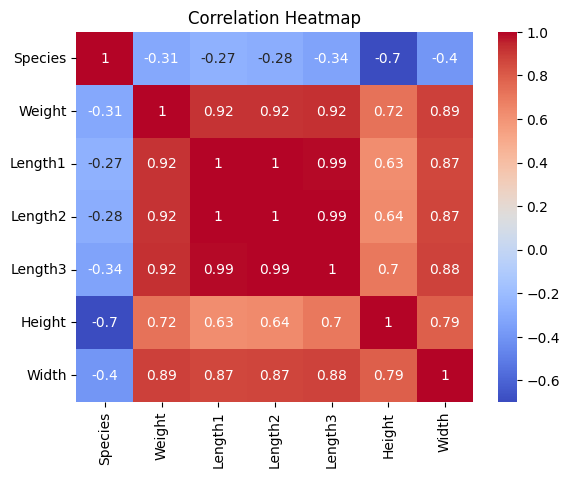

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Encode the 'Species' column
label_encoder = LabelEncoder()
fish['Species'] = label_encoder.fit_transform(fish['Species'])

# Select only numerical columns
numeric_fish = fish.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap
sns.heatmap(numeric_fish.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### load data and plot

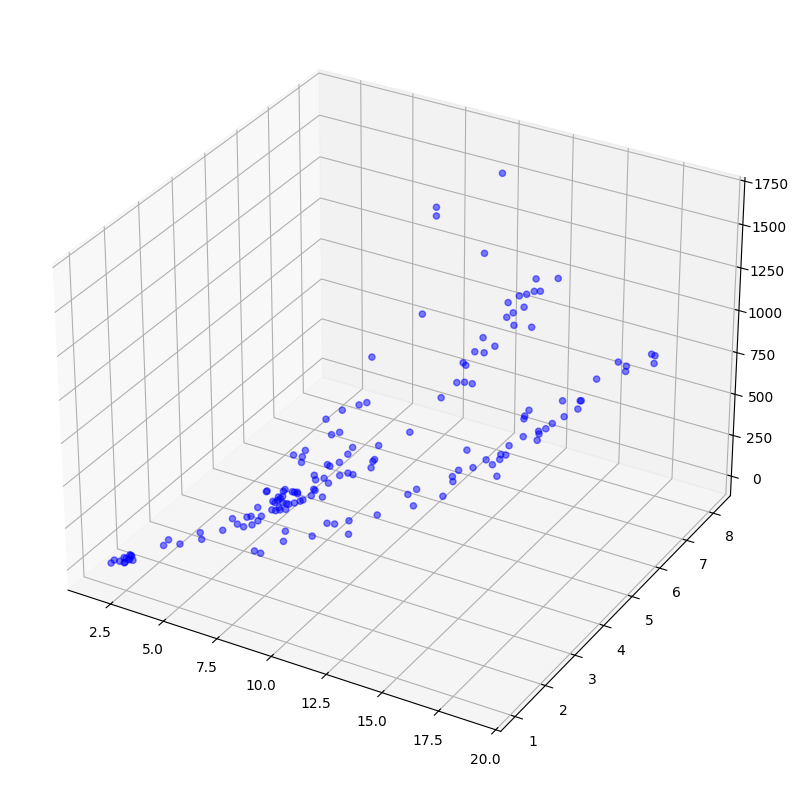

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fish = pd.read_csv("Fish.csv")

x_height = fish['Height']
x_width = fish['Width']
y_weight = fish['Weight']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_height,x_width,y_weight,c='blue',marker='o',alpha=0.5)

### predict and plot

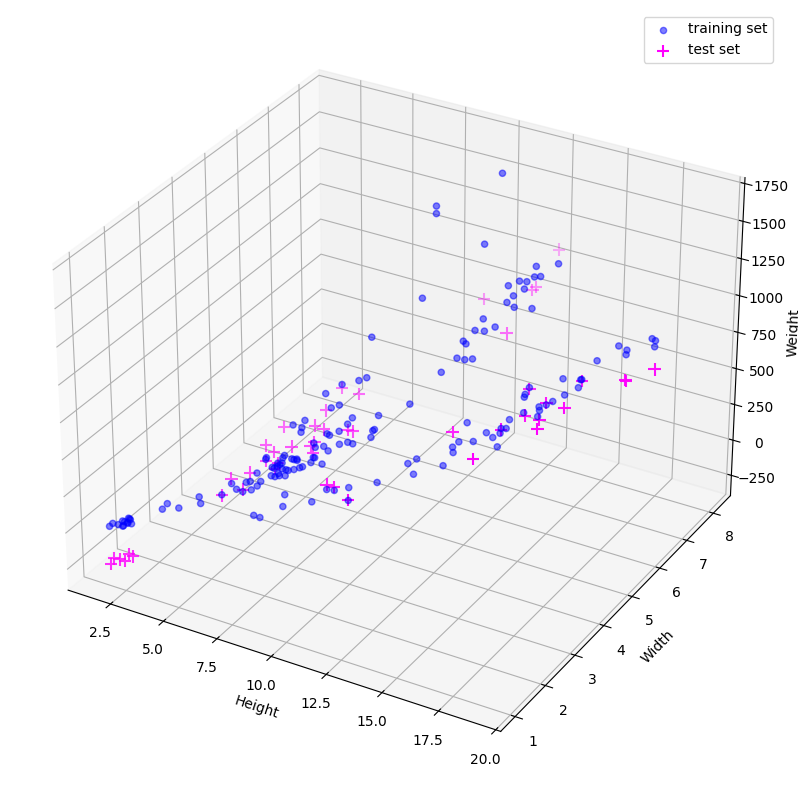

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.column_stack((x_height, x_width))
y = y_weight

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x_height, x_width, y_weight, c='blue', marker='o', alpha=0.5, label='training set')

ax.scatter(X_test[:,0], X_test[:,1], y_pred_test, c='magenta', marker='+', s=80, label="test set")
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')
ax.legend()

### predict new value (unseen dataset)

an hypothetical fish with height 10 and width 8 should weigh 1068.1123260157347


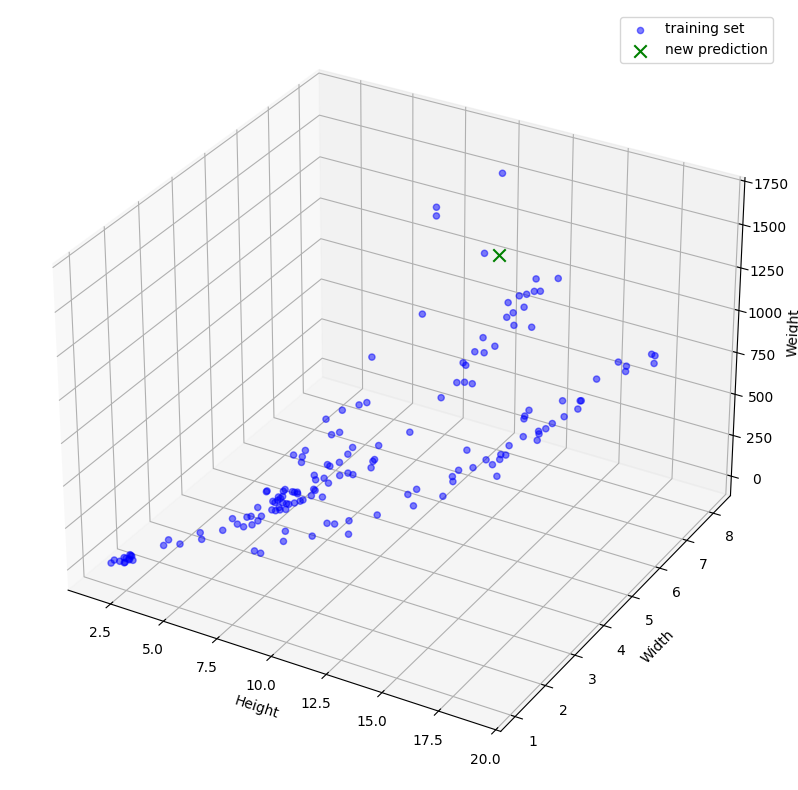

In [24]:
y_pred_new = model.predict([[10,8]])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_height, x_width, y_weight, c='blue', marker='o', alpha=0.5, label="training set")

ax.scatter(10, 8, y_pred_new, c='green', marker='x', s=80, label="new prediction")

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')
ax.legend()

print(f"an hypothetical fish with height 10 and width 8 should weigh {y_pred_new[0]}")


### model quality

In [28]:
from sklearn.metrics import mean_absolute_error

training_set_MAE = mean_absolute_error(y_train, y_pred_train)
test_set_MAE = mean_absolute_error(y_test, y_pred_test)

print('training set MAE', training_set_MAE)
print('Test set MAE', test_set_MAE)


training set MAE 116.58749280928038
Test set MAE 110.74140162429484


## polynomial regression

fish plot ressembles more a curve than a line

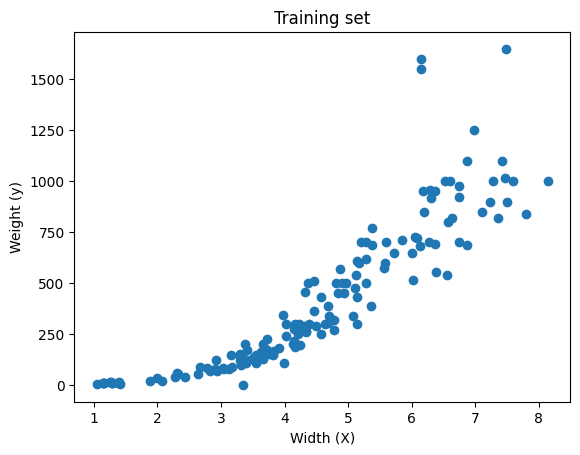

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fish = pd.read_csv("Fish.csv")

y_weight = fish['Weight']
x_width = fish['Width']

plt.scatter(x_width, y_weight)
plt.title('Training set')
plt.xlabel('Width (X)')
plt.ylabel('Weight (y)')
plt.show()


In [30]:
### predict and plot

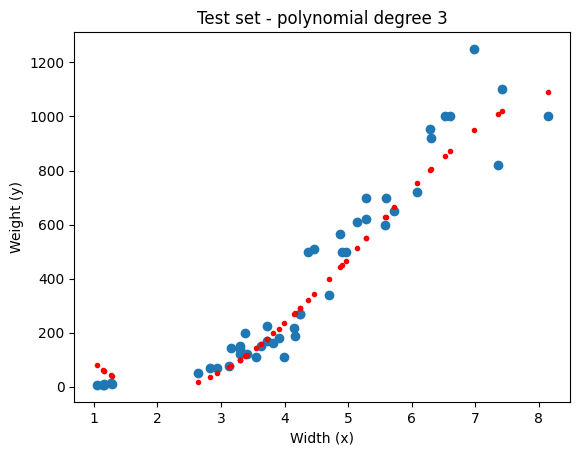

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 3

x_train, x_test, y_train, y_test = train_test_split(x_width, y_weight, test_size=0.30, random_state=42)
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

x_tr = np.array(x_train).reshape(-1,1)
y_tr = np.array(y_train).reshape(-1,1)
model.fit(x_tr, y_tr)

x_ts = np.array(x_test).reshape(-1,1)
y_ts = np.array(x_test).reshape(-1,1)

y_pred = model.predict(x_ts)

plt.title("Test set - polynomial degree 3")
plt.xlabel("Width (x)")
plt.ylabel("Weight (y)")

plt.scatter(x_test, y_test)
plt.scatter(x_ts, y_pred, c="red", marker='.')
plt.show()

### predict new value (unseen in data)

an hypothetical fish with width 4.5 would weigh 351.62423072692343 grams


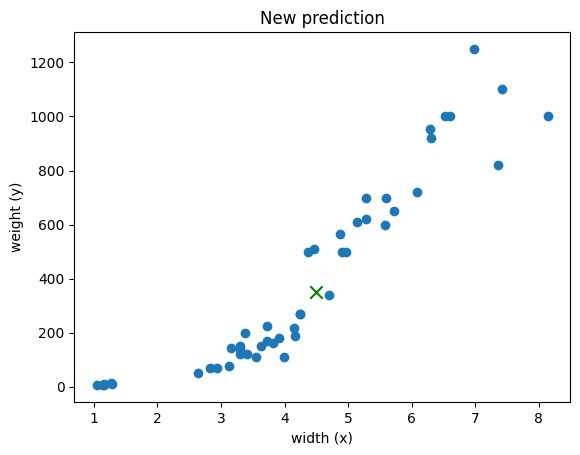

In [48]:
y_pred_new = model.predict([[4.5]])

plt.title("New prediction")
plt.xlabel("width (x)")
plt.ylabel("weight (y)")

plt.scatter(x_test, y_test)
plt.scatter(4.5, y_pred_new, c='green', marker='x', s=80)

print(f"an hypothetical fish with width 4.5 would weigh {y_pred_new[0][0]} grams")

### model quality

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_train = model.predict(np.array(x_train).reshape(-1,1))
y_pred_test = model.predict(np.array(x_test

training_set_MAE = mean_absolute_error(y_train, y_pred_train)
test_set_MAE = mean_absolute_error(y_test, y_pred_test)

print('training set MAE', training_set_MAE)
print('Test set MAE', test_set_MAE)
